# Assignment 1 INFO204 Yuki Yoshiyasu 5861229

# Introduction
New Zealand has cultivated an image for itself as a "clean and green" country. However, we are increasingly aware of the fragility of our natural systems, and in particular the importance that our freshwater systems play on our fauna and flora. Maintaining good freshwater health has important environmental, economic, and political issues. In the analysis we will be investigating these issues using multiple data wrangling techniques.


In [2]:
#All the imports for the assignement
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Part 1: Data Wrangling and EDA

In [3]:
#Cleaning the data by removing irrelevant columns

sites = pd.read_csv('https://drive.google.com/uc?export=download&id=1lx4k_ZhvtJLs1i65BiAop7b-86SeOqRN', compression='gzip')
## remove irrelevant visit variables here
columns_to_remove = ["Altitude","Catchment area","Catchment height"]
sites.drop(columns = columns_to_remove, inplace = True)
sites.info()
sites.describe()
print(sites)


site_visits = pd.read_csv('https://drive.google.com/uc?export=download&id=1tGBh4LD1UTlGfwGTS2-iMk_x6daRXPfA', compression='gzip')
## remove irrelevant visit variables here
columns_to_remove = ["Scientist","Verified By","Day of Week"]
site_visits.drop(columns = columns_to_remove, inplace = True)
site_visits.info()
site_visits.describe()
print(site_visits)


long_measurements = pd.read_csv('https://drive.google.com/uc?export=download&id=1Gl-BDg6gsJG25PgJkj7TFDxUkUPgyPgw', compression='gzip')
long_measurements.info()
long_measurements.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SiteID     77 non-null     object 
 1   Region     77 non-null     object 
 2   Name       77 non-null     object 
 3   Longitude  77 non-null     float64
 4   Latitude   77 non-null     float64
dtypes: float64(2), object(3)
memory usage: 3.1+ KB
   SiteID      Region                     Name   Longitude   Latitude
0     AK1    Auckland           Hoteo at Gubbs  174.516776 -36.387085
1     AK2    Auckland   Rangitopuni at Walkers  174.617716 -36.746082
2     AX1   Alexandra    Clutha at Luggate Br.  169.279966 -44.730920
3     AX2   Alexandra      Kawarau at Chard Rd  168.868674 -45.007995
4     AX3   Alexandra  Shotover at Bowens Peak  168.714900 -44.991606
..    ...         ...                      ...         ...        ...
72    WN1  Wellington         Hutt at Boulcott  174.921966 -41.199706
73    

Value
count  308555.000000
mean       92.092955
std       342.991958
min         0.000000
25%         7.000000
50%        14.600000
75%       100.300000
max     72700.000000

Each of the dataset has been obtained by using the link given for the assignemnt. Then I have dropped unwanted columns for each dataset and to obtain the desired dataframe, printing the descriptive statistics of each dataset have also helped to determine which columns to keep. 

In [4]:
#Adding columns Year Hour and Season
site_visits
site_visits['Timestamp'] = pd.to_datetime(site_visits['Timestamp'])
site_visits['Year'] = site_visits['Timestamp'].dt.year
site_visits['Hour of day'] = site_visits['Timestamp'].dt.hour

def get_season(month):
    seasons = {0: 'Summer', 1: 'Autumn', 2: 'Winter', 3: 'Spring'}
    return seasons[(month % 12) // 3]
site_visits['Season'] = site_visits['Timestamp'].dt.month.apply(get_season)
    
print(site_visits)

wide_measurements = long_measurements.pivot(index = "checksum",columns='Measurement', values='Value')
wide_measurements["log(E Coli)"] = np.log10(wide_measurements["E Coli"]+1)

display(wide_measurements)



                      Timestamp SiteID                          checksum  \
0     1989-02-01 10:30:00+00:00    AK1  deda7828c5ca8ae842d1d4c7dbaf8d7c   
1     1989-03-15 11:45:00+00:00    AK1  5c47147d9c97ab9712106a520320c92b   
2     1989-04-13 11:10:00+00:00    AK1  e6b793a64f5092a9ddc3fb850c92b150   
3     1989-05-10 11:10:00+00:00    AK1  efe6310e08bbddf82bf35b713fd7bd94   
4     1989-06-08 10:20:00+00:00    AK1  fc98017089311bfe513985c5e01393e7   
...                         ...    ...                               ...   
29596 2021-08-17 09:45:00+00:00    AX4  2d4fe85b2e25d08a45be0a1db9f6fdac   
29597 2021-08-18 08:35:00+00:00    GY4  0d6cd16a677d4d0bf16601719ec21dbf   
29598 2022-12-15 12:25:00+00:00    TU1  5d949a8ce724ad593491c7a0fd0008d3   
29599 2022-12-15 08:30:00+00:00    TU2  a4378b7ff6be3e824664d24e94fdfa64   
29600 2022-12-14 11:15:00+00:00    WA5  93663c6c9d9caf94a7b3ca8ba0fdbd1e   

       Year  Hour of day  Season  
0      1989           10  Summer  
1      1989      

Measurement                       Ammonia  Dissolved Oxygen Saturation  \
checksum                                                                 
000414253acc7df5faa656c94ca8e628      9.0                        100.3   
0004f9dd58ee6cef1650fa225300f3ee      9.0                        100.0   
0004fcf11172c3fcb74264fa36d33cbd     58.0                        112.7   
000a014f09a691b27896d4731f985f47      4.0                        102.3   
000fc049dbfa7b01334dbd0401992081      7.0                         99.8   
...                                   ...                          ...   
ffeae564043ba08ac2abd68299c12e92      8.0                         78.0   
fff224af9c3d20e1b32645aadca78da8      8.0                         96.8   
fff46cdd9d8d285af4e10467783b8d41     69.0                         98.7   
fff51d3deea67e60c45d6a1cee40daef      4.0                        100.0   
fff75fd36275ee970e9b3f566a092076     10.0                         95.0   

Measurement                       Dissolved Reactive Phosphate  E Coli  \
checksum                                                                 
000414253acc7df5faa656c94ca8e628                          31.5     NaN   
0004f9dd58ee6cef1650fa225300f3ee                           6.0     NaN   
0004fcf11172c3fcb74264fa36d33cbd                           2.0     NaN   
000a014f09a691b27896d4731f985f47                           6.2     NaN   
000fc049dbfa7b01334dbd0401992081                           7.4    77.1   
...                                                        ...     ...   
ffeae564043ba08ac2abd68299c12e92                           5.0     NaN   
fff224af9c3d20e1b32645aadca78da8                           5.2   365.4   
fff46cdd9d8d285af4e10467783b8d41                           5.0     NaN   
fff51d3deea67e60c45d6a1cee40daef                           3.4     NaN   
fff75fd36275ee970e9b3f566a092076                           5.1   697.0   

Measurement                       Electrical Conductivity  Nitrate + Nitrite  \
checksum                                                                       
000414253acc7df5faa656c94ca8e628                     68.6              109.0   
0004f9dd58ee6cef1650fa225300f3ee                    108.0               68.0   
0004fcf11172c3fcb74264fa36d33cbd                    139.0              425.0   
000a014f09a691b27896d4731f985f47                    121.0               11.0   
000fc049dbfa7b01334dbd0401992081                     94.2             1228.0   
...                                                   ...                ...   
ffeae564043ba08ac2abd68299c12e92                    209.0                1.0   
fff224af9c3d20e1b32645aadca78da8                     90.0              325.0   
fff46cdd9d8d285af4e10467783b8d41                     78.7              285.0   
fff51d3deea67e60c45d6a1cee40daef                     94.8              246.0   
fff75fd36275ee970e9b3f566a092076                    108.4               71.0   

Measurement                        URS  Water Clarity  Water Kelvin  \
checksum                                                              
000414253acc7df5faa656c94ca8e628   5.8           0.45        292.95   
0004f9dd58ee6cef1650fa225300f3ee  14.3           0.05        281.65   
0004fcf11172c3fcb74264fa36d33cbd  10.9           3.17        286.35   
000a014f09a691b27896d4731f985f47   5.8           3.05        281.05   
000fc049dbfa7b01334dbd0401992081  13.4           2.31        286.35   
...                                ...            ...           ...   
ffeae564043ba08ac2abd68299c12e92   8.5           1.95        295.35   
fff224af9c3d20e1b32645aadca78da8   8.4           2.42        288.15   
fff46cdd9d8d285af4e10467783b8d41   9.9           0.03        287.85   
fff51d3deea67e60c45d6a1cee40daef  21.5           1.69        280.55   
fff75fd36275ee970e9b3f566a092076  15.6           0.36        287.25   

Measurement                       Water Temp    pH  log(E Coli)  
checksum                                   

In this step I have converted the 'site_visits' timestamp column into a datetime format, extracting year and hour information, and deriving a 'Season' column based on the month. Additionally for the other dataset the long measurements have been converted to a wide dataset. Also addding a new column for log(E Coli), which is calculated by the log10 function from numpy.

### Combines the dataframes into a wide single master data frame

In [5]:
master_df = sites.merge(site_visits,how = "inner", on='SiteID')
#master_df.set_index('SiteID',inplace = True)
master_df = master_df.merge(wide_measurements,how = "inner", on = "checksum")

master_df.drop(columns = "checksum", inplace = True)
#display(master_df)

master_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29599 entries, 0 to 29598
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   SiteID                        29599 non-null  object             
 1   Region                        29599 non-null  object             
 2   Name                          29599 non-null  object             
 3   Longitude                     29599 non-null  float64            
 4   Latitude                      29599 non-null  float64            
 5   Timestamp                     29599 non-null  datetime64[ns, UTC]
 6   Year                          29599 non-null  int32              
 7   Hour of day                   29599 non-null  int32              
 8   Season                        29599 non-null  object             
 9   Ammonia                       28563 non-null  float64            
 10  Dissolved Oxygen Saturation   2938

In order to combine the dataset into a single master_df, I have using the merge function joining by the siteID, and dropping the non needed checksum column.

In [6]:
temp_selected = ["Longitude","Latitude","Year", "Hour of day","Season","URS","Water Kelvin","Water Temp"] 
temp_model_data = master_df[temp_selected]
temp_model_data = temp_model_data.dropna()
display(temp_model_data)
temp_model_data.info()


Longitude   Latitude  Year  Hour of day  Season   URS  Water Kelvin  \
0      174.516776 -36.387085  1989           10  Summer  13.9        292.25   
1      174.516776 -36.387085  1989           11  Autumn   9.0        294.05   
2      174.516776 -36.387085  1989           11  Autumn  12.5        288.05   
3      174.516776 -36.387085  1989           11  Autumn   8.7        286.55   
4      174.516776 -36.387085  1989           10  Winter   7.7        282.15   
...           ...        ...   ...          ...     ...   ...           ...   
29594  175.604835 -40.763879  2022           13  Spring  18.8        285.45   
29595  175.604835 -40.763879  2022           13  Spring  12.8        288.85   
29596  175.604835 -40.763879  2022           13  Summer  11.0        292.05   
29597  175.604835 -40.763879  2023           13  Summer   3.9        290.25   
29598  175.604835 -40.763879  2004           14  Summer  26.8        288.65   

       Water Temp  
0            19.1  
1            20.9  
2            14.9  
3            13.4  
4             9.0  
...           ...  
29594        12.3  
29595        15.7  
29596        18.9  
29597        17.1  
29598        15.5  

[29548 rows x 8 columns]

<class 'pandas.core.frame.DataFrame'>
Index: 29548 entries, 0 to 29598
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Longitude     29548 non-null  float64
 1   Latitude      29548 non-null  float64
 2   Year          29548 non-null  int32  
 3   Hour of day   29548 non-null  int32  
 4   Season        29548 non-null  object 
 5   URS           29548 non-null  float64
 6   Water Kelvin  29548 non-null  float64
 7   Water Temp    29548 non-null  float64
dtypes: float64(5), int32(2), object(1)
memory usage: 1.8+ MB


I have selected which variables to keep in the temp_model_data dataframe and dropped all na values.

### EDA for temp_model_data

Upon observing the temp_model_data we can see it consists of 8 columns (Longitude,Latitude,Year, Hour of day,Season,URS,Water Kelvin and Water Temp). Majority of the datatypes are float64, int32's whereas the season column is an object. Floats and ints are both numerical values and differs if they have a decimal placing or not. We cannot observe any missing data in the temp_model_data dataframe. I beleive we can suggest to remove the Water Kelvin column since we already have the celsius readings which can be found by the Water Temp column. 
Hour of day and URS also seems irrelavent as those variables do not aid in investigating the temperature of the NZ water system, we will be investigating this further in the following steps. 




/Users/yukiyoshiyasu/anaconda3/envs/INFO204/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


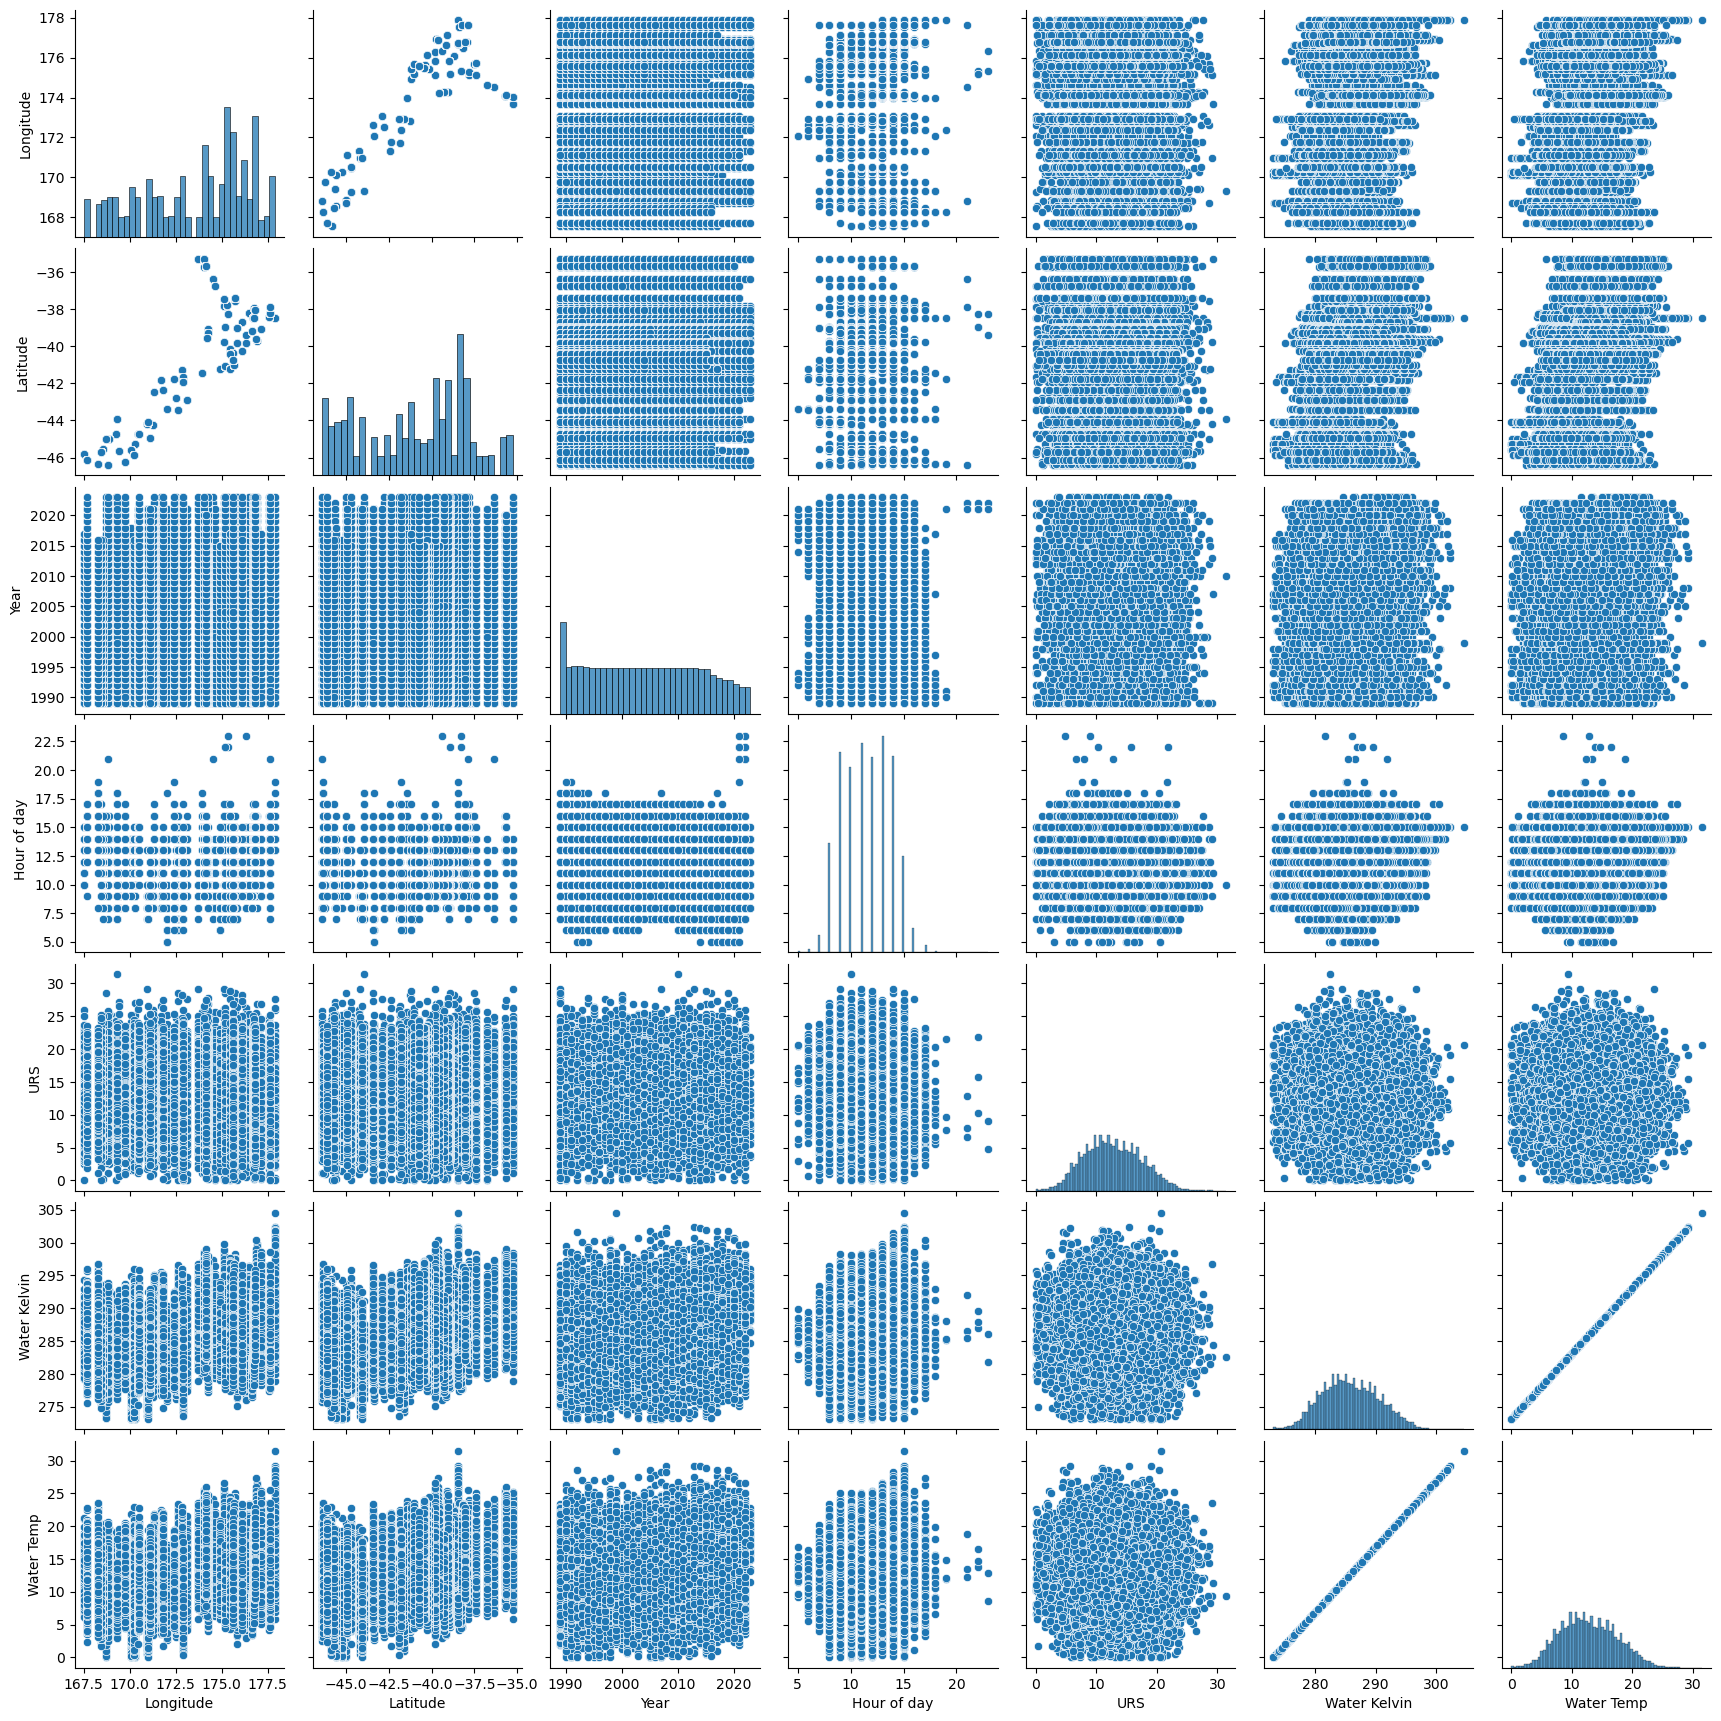

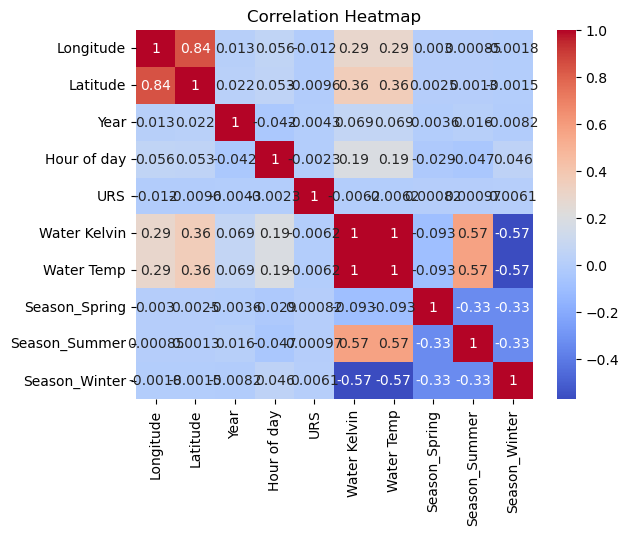

In [7]:

sns.pairplot(temp_model_data[temp_selected])
plt.show()

#change season to categorical
temp_model_data['Season'] = temp_model_data['Season'].astype('category')

#dummy variables for the categorical "season" column
temp_model_data_with_dummies = pd.get_dummies(temp_model_data[temp_selected], columns=['Season'], drop_first=True)

#correlation heatmap
sns.heatmap(temp_model_data_with_dummies.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The pairplot suggests there being some correlation between longitude, latitude and water temp. The plots for those variables show a slight linear trend, most likley since the warmer region of NZ would be in the northern part of the island. Water temp and water kelvin has a positive linear relationship, suggesting one of the variables can be removed, in this case the water kelvin should be dropped.

Observing the heat map for the temp_model_data we can see that season, latitude, longitude and water temp has some correlation which indicates those are the key columns that should stay in the dataset. The Year columns doesnt seem to have a correlation as the heat map reading is near 0, therefore suggests that it can be dropped. However keeping the year column will be beneficial to keep as a timestamp to keep track the trend of the results. URS also has readings near 0 suggesting it to be dropped from the dataset. The water temp for the summer season outputteda orange mark of 0.57 whereas with winter was -0.57 which is a significant correlation compared to the other variable, indicating the importance of the variables.



In [8]:
env_selected = ["Ammonia","Dissolved Oxygen Saturation","Dissolved Reactive Phosphate","Electrical Conductivity","Nitrate + Nitrite","Water Clarity","Water Temp","pH","log(E Coli)"]
env_model_data = master_df[env_selected]
env_model_data = env_model_data.dropna()
display(env_model_data)

Ammonia  Dissolved Oxygen Saturation  Dissolved Reactive Phosphate  \
196        8.0                         88.9                          21.4   
197        6.0                         90.7                          14.1   
198        1.0                         89.6                          17.7   
199       28.0                         82.1                          27.8   
200       26.0                         88.5                          28.0   
...        ...                          ...                           ...   
29593      2.0                        101.2                           2.0   
29594      3.0                        102.1                           2.0   
29595      3.0                        102.3                           2.0   
29596      4.0                        102.1                           2.0   
29597      1.0                        102.6                           3.0   

       Electrical Conductivity  Nitrate + Nitrite  Water Clarity  Water Temp  \
196                      190.0              155.0           0.68        20.1   
197                      204.0                4.0           1.08        18.9   
198                      227.0                6.0           1.26        14.3   
199                      207.0              694.0           0.59        15.6   
200                      198.0              637.0           0.53        10.5   
...                        ...                ...            ...         ...   
29593                     51.9               29.0          10.00        10.3   
29594                     48.8               22.0           6.80        12.3   
29595                     53.6                5.0          10.48        15.7   
29596                     55.9                8.0          11.47        18.9   
29597                     58.0               21.0          11.44        17.1   

         pH  log(E Coli)  
196    7.43     2.082785  
197    7.62     1.623249  
198    7.66     1.939519  
199    7.22     2.309630  
200    7.37     3.020046  
...     ...          ...  
29593  7.67     0.602060  
29594  7.54     0.602060  
29595  7.64     0.698970  
29596  7.81     0.602060  
29597  7.73     1.431364  

[14250 rows x 9 columns]

### EDA for env_model_data

Upon observing the env_model_data dataframe we can see all of the columns types are float64 with 9 total columns. We can observe missing values in the log(E Coli) column where the first 5 readings has no presence of E Coli. This is as expected since that will be a disaster if most of the NZ water is contaminaited, therefore we will expect encountering into E Coli readings in this dataframe at a very low frequency. I would remove the Electrical conductivity variable from this data frame.



/Users/yukiyoshiyasu/anaconda3/envs/INFO204/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

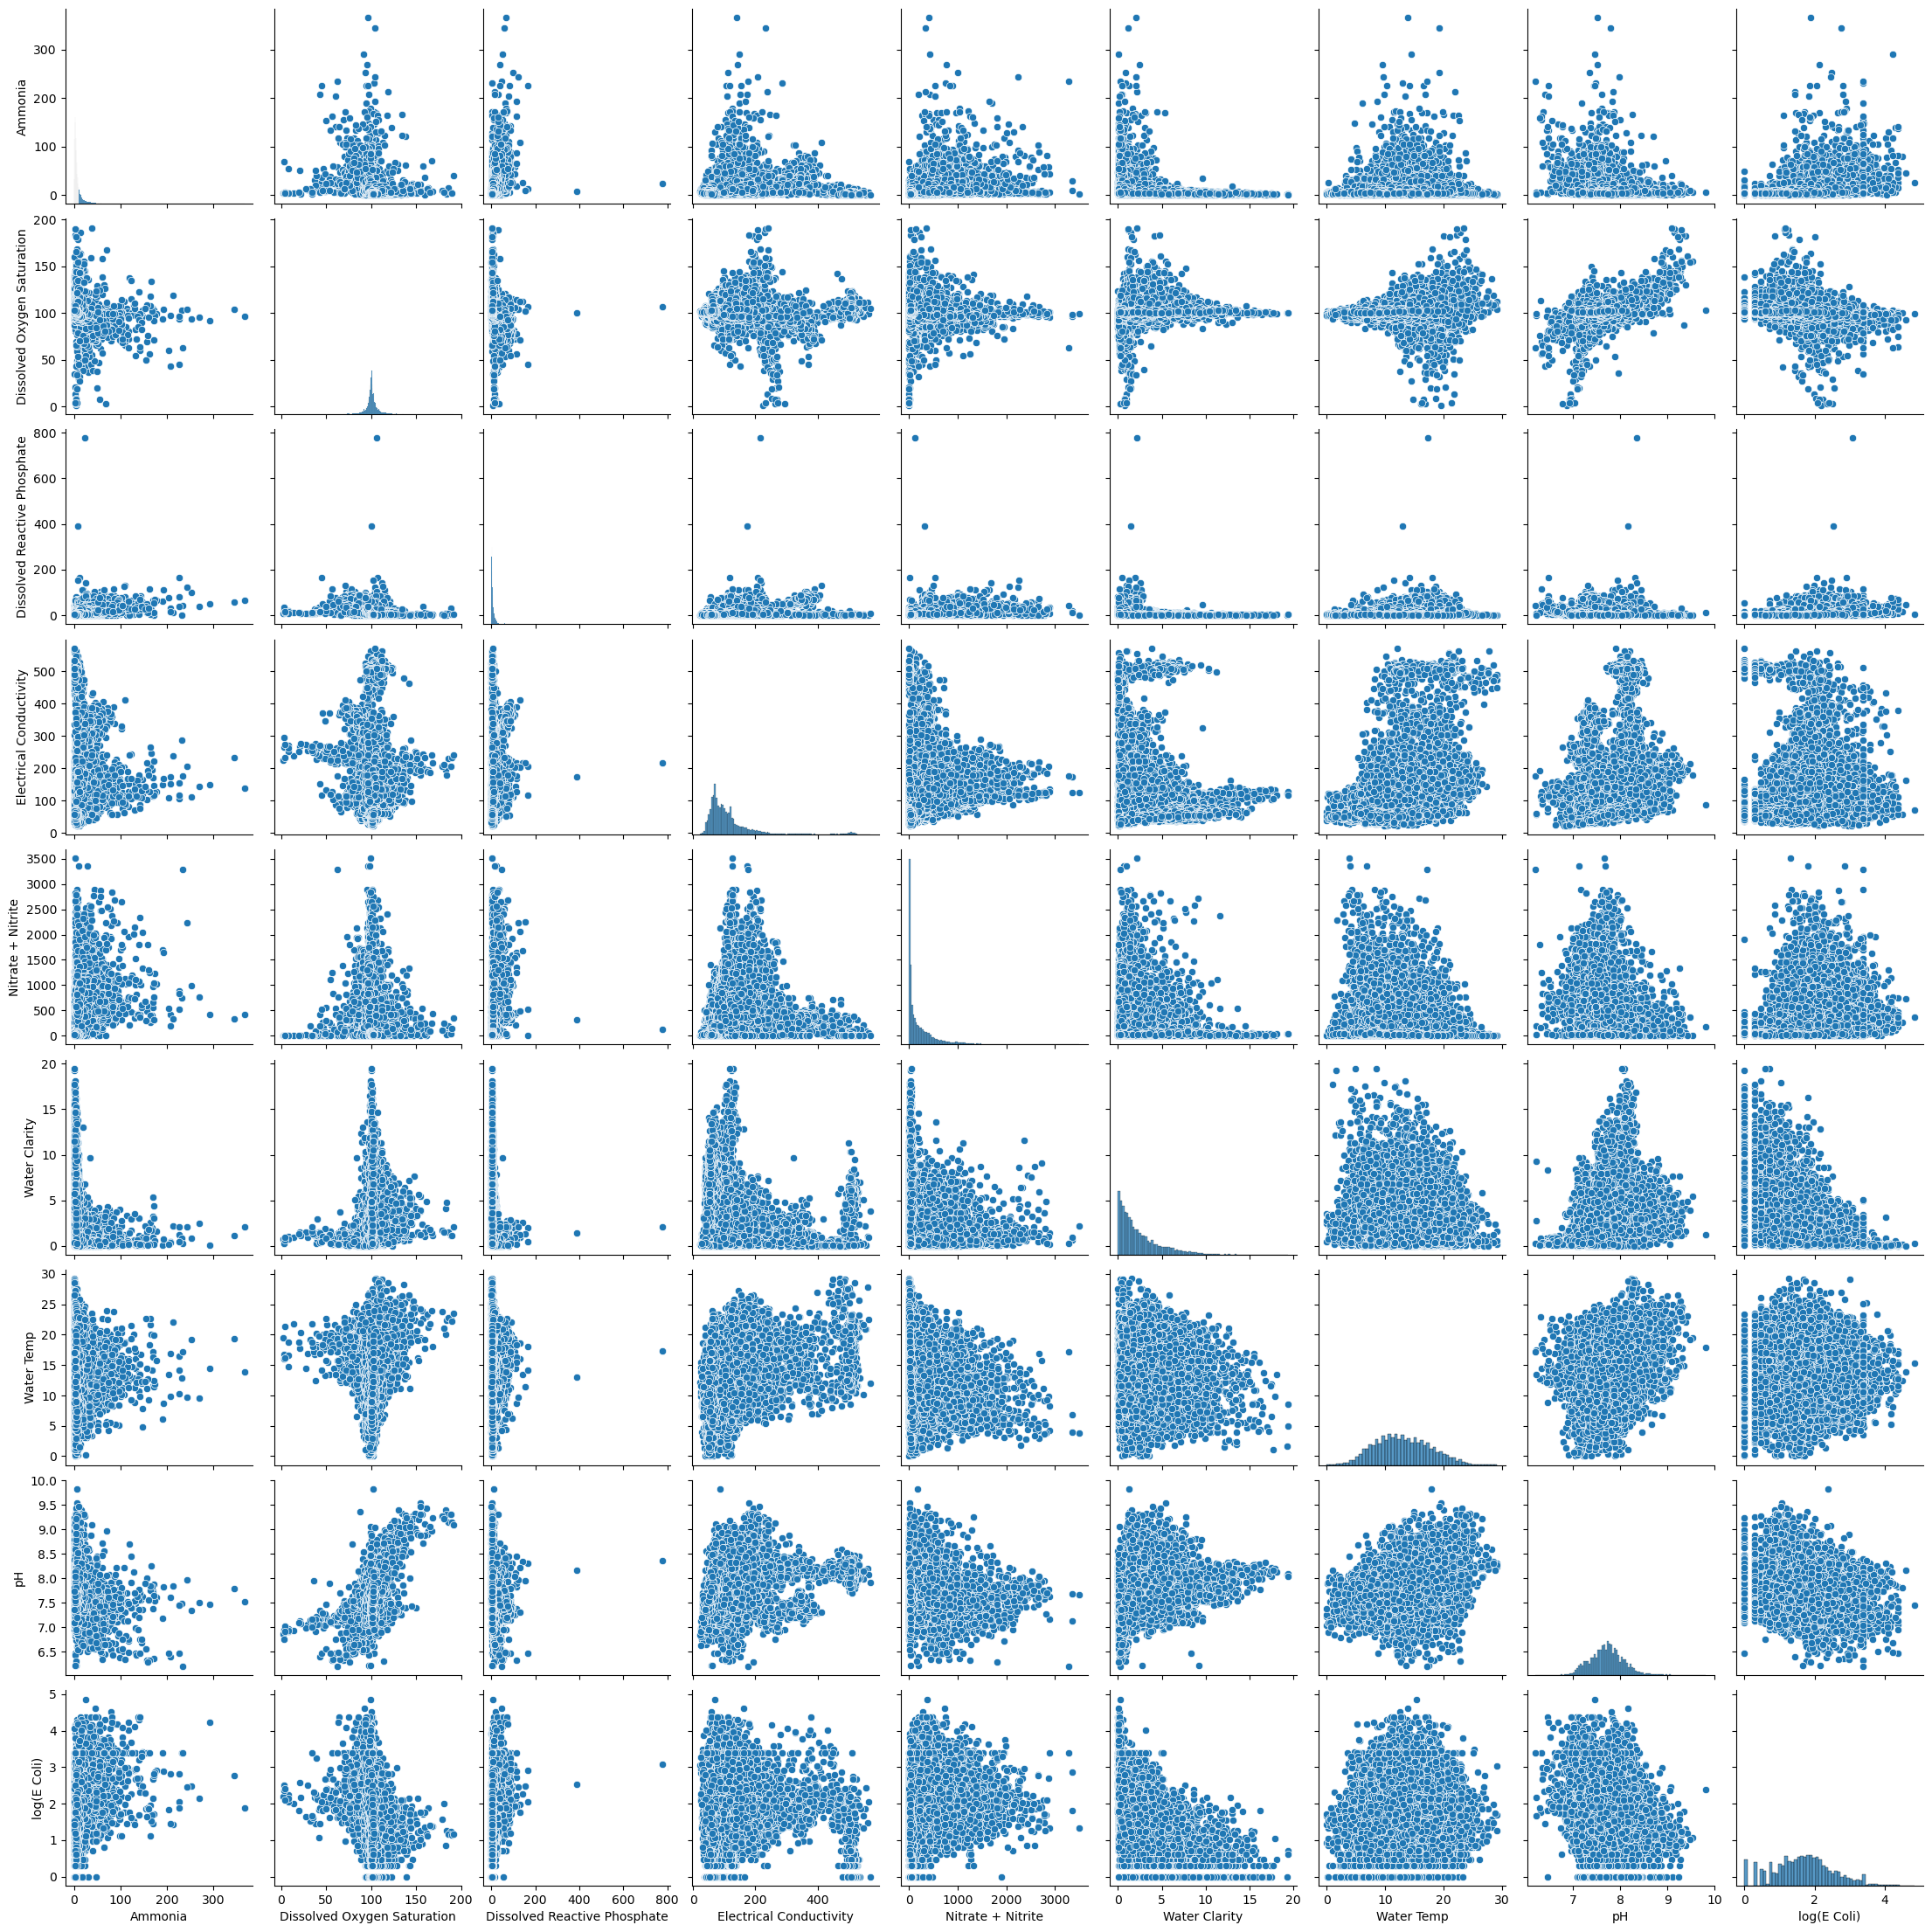

In [9]:
sns.pairplot(env_model_data[env_selected])
plt.show


In [10]:
correlation_matrix = env_model_data[env_selected].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From the pairplot, Log E Coli and water clarity could be investigated further as it shows a right skewed graph. Dissolved oxygen saturation and pH can be seen to have a correlation while interpreting the data with its similar trend to linear increase.

Observing the heat map for the temp_model_data we can see that Dissolved oxygen saturation and pH  has a correlation which indicates those are the key columns that must stay in the dataset. Water clarity can be seen with a negative colleration with the log(C Coli readings) which was as expected since the clarity of water should decrease if bacteria E Coli is present. Wheareas Electrical conductivity has a correlation reading near 0.2 which is extremely low as a reading of 0 means that there is no colleration observed thus is suggested to be dropped.

# Part 2: Data Querying / Exploration

In [11]:
# Group by 'SiteID' and find the maximum observed 'Timestamp'
last_visited_df = master_df.groupby('SiteID')['Timestamp'].max().reset_index()

# Rename the 'Timestamp' column to 'LastVisited'
last_visited_df.rename(columns={'Timestamp': 'Last Sampled'}, inplace=True)

# Merge the 'last_visited_df' with the 'sites' DataFrame on 'SiteID'
result_df = sites.merge(last_visited_df, on='SiteID')
display(result_df)

# Save the result to 'last_visited.csv'
result_df.to_csv('last_visited.csv', index=False)


SiteID      Region                     Name   Longitude   Latitude  \
0     AK1    Auckland           Hoteo at Gubbs  174.516776 -36.387085   
1     AK2    Auckland   Rangitopuni at Walkers  174.617716 -36.746082   
2     AX1   Alexandra    Clutha at Luggate Br.  169.279966 -44.730920   
3     AX2   Alexandra      Kawarau at Chard Rd  168.868674 -45.007995   
4     AX3   Alexandra  Shotover at Bowens Peak  168.714900 -44.991606   
..    ...         ...                      ...         ...        ...   
72    WN1  Wellington         Hutt at Boulcott  174.921966 -41.199706   
73    WN2  Wellington          Hutt at Kaitoke  175.191361 -41.052600   
74    WN3  Wellington   Ruamahanga at Waihenga  175.439426 -41.197160   
75    WN4  Wellington   Ruamahanga at Wardells  175.671349 -41.004683   
76    WN5  Wellington        Ruamahanga at SH2  175.604835 -40.763879   

                Last Sampled  
0  2023-01-10 11:05:00+00:00  
1  2021-07-06 11:26:00+00:00  
2  2023-01-10 11:40:00+00:00  
3  2022-01-11 14:10:00+00:00  
4  2023-01-10 13:40:00+00:00  
..                       ...  
72 2015-09-16 14:10:00+00:00  
73 2023-01-18 08:25:00+00:00  
74 2017-06-26 14:40:00+00:00  
75 2015-09-30 10:00:00+00:00  
76 2023-01-18 13:15:00+00:00  

[77 rows x 6 columns]

The key variables I have identified in this step is SiteID and Timestamp as these are required to sort the data by the SiteID order and timeStamp is needed to calculate the last sampled time. The operations I have used is the groupby function to sort the data in SiteID, used {:} to map the time stamp to be called last Sampled. Rename function was used to rename the time stamp to last Sampled. sites.merge was used to merge the sites dataframe to the last_visited dataframe using SiteID as a unique key. The last line of code .to_csv outputs the resulted dataframe to a csv named as "last_visited".

SiteID  UnsafeSampleCount   Longitude   Latitude
0       GS2                 80  177.561462 -38.416776
411     HM2                 79  175.151645 -37.800344
817     WA1                 78  174.254867 -39.049664
1229    DN5                 75  168.797037 -46.391100
1641    WA4                 54  175.142311 -39.788644
2049    GS3                 52  177.620792 -38.201502
2459    HM1                 49  175.348059 -38.270489
2866    WA7                 47  176.111484 -40.242260
3279    WH2                 47  174.047358 -35.278154
3686    GS1                 45  177.881610 -38.470312

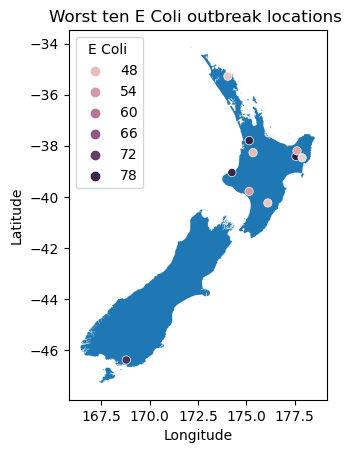

In [12]:
import fiona
# Fetchs the NZ shape
def fetch_nz_shape():
    import requests
    import fiona
    import geopandas as gpd
    
    nz_shape = "https://drive.google.com/uc?export=download&id=1CsIBfAjOLJLrMoWSD5SN6x5ggUOYxKmP"
    request = requests.get(nz_shape)
    b = bytes(request.content)
    with fiona.BytesCollection(b) as f:
        crs = f.crs
        gdf = gpd.GeoDataFrame.from_features(f, crs=crs)
    return gdf

nz_shape = fetch_nz_shape()   ## A geopandas data frame that outlines the coordinates of New Zealand

# Puts the E Coli readings from master_df exceeding 550 in a new data frame
ecoli_unsafe_df = master_df[(master_df['E Coli'] > 550)]

# Group by 'SiteID' and count the number of unsafe samples, sorts values
unsafe_counts = ecoli_unsafe_df.groupby('SiteID').size().reset_index(name='UnsafeSampleCount')
unsafe_10 = unsafe_counts.sort_values(by='UnsafeSampleCount', ascending=False).head(10)

unsafe_10_coords = unsafe_10.merge(master_df[['SiteID', 'Longitude', 'Latitude']], on='SiteID')
# removes duplicate readings
unique_unsafe_10_coords = unsafe_10_coords.drop_duplicates(subset='SiteID')
# Displays the unique unsafe 10 coords dataframe
display(unique_unsafe_10_coords)
# plots the NZ boundary
nz_shape.plot()
# Plots the data, with hue as unsafe sample count
sns.scatterplot(data = unique_unsafe_10_coords, x = "Longitude", y = "Latitude", color = "black" , hue = "UnsafeSampleCount")
# Adds the legend with title
plt.legend(title = "E Coli ")
# Adds the title of the graph
plt.title("Worst ten E Coli outbreak locations ")
# outputs the graph
plt.show()



The key variables I have identified while acquiring the data for the worst ten E Coli out break locations were SiteID, E Coli, Latitude and Longitude. This is because to obtain the unsafe E Coli counts we first had to get readings that exceeded 550(cfu/100 mL) and then count how many unsafe readings were observed. SiteID was needed in order to use as groupby and as a unique key for merging the dataframes to obtain the latitude and the longitude of the readings. The merging operation occured between the 10 unsafe readings and the master_df. Latitdue and longitude was needed inorder to plot the readings on the correct location of the graph.

Operations I have utilized were a conditional operator to check the E Coli readings was above 550(cfu/100 mL), groupby function to order the data via the SiteID, sort_values was used to arange the order of the values by smallest to largest and size() function to count the number of readings. Drop_duplicates(subset='SiteID') was used to remove the duplicated siteID readings, as we dont want duplicated readings plotted on the graph. Finally the rest of the simple code was used to plot the graph using seaborns scatterplot function and matplotlibs functions. 

Overall, viewing the graph allows us to identify 9 out of the 10 E Coli outbreaks have occured in the Northisland of New Zealand. Whereas one out break has occured in the South island.

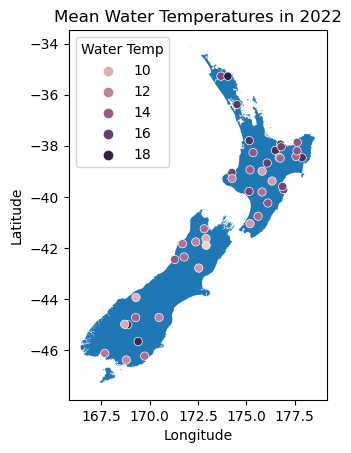

In [13]:
# Fetches the nz shape

import fiona
def fetch_nz_shape():
    import requests
    import fiona
    import geopandas as gpd
    
    nz_shape = "https://drive.google.com/uc?export=download&id=1CsIBfAjOLJLrMoWSD5SN6x5ggUOYxKmP"
    request = requests.get(nz_shape)
    b = bytes(request.content)
    with fiona.BytesCollection(b) as f:
        crs = f.crs
        gdf = gpd.GeoDataFrame.from_features(f, crs=crs)
    return gdf

nz_shape = fetch_nz_shape()   ## A geopandas data frame that outlines the coordinates of New Zealand

# filters the data for only when year in 2022
year_2022 = master_df[master_df['Year'] == 2022]

# groups by siteID and calculates watertemp mean and resets index
meantemp = year_2022.groupby('SiteID')['Water Temp'].mean().reset_index()

# mereges the dfs together to obtain coordinates to plot removing dupes
meantemp_coords = meantemp.merge(year_2022[['SiteID', 'Longitude', 'Latitude']].drop_duplicates(subset='SiteID'),on='SiteID')

# plot the nz shape
nz_shape.plot()
# plot the mean temperature points on the map
sns.scatterplot(data = meantemp_coords, x = "Longitude",y = "Latitude",hue = "Water Temp")
# adds legend
plt.legend(title = "Water Temp")
# xlabel
plt.xlabel('Longitude')
# ylabel
plt.ylabel('Latitude')
# adds title
plt.title('Mean Water Temperatures in 2022')
# outputs the graph
plt.show()



The key variables identified for the mean water temperatures were year, siteID, temperature, longitude and latitude. Firstly filtering the year to 2022 was needed to get the data in the desired year. To obtain the mean temperature the siteID was needed to group by the data to obtain the mean temperatures using basic python function (.mean()). Then to obtain the coordinates we had to merge the dataframes dropping the duplicate values. Finally, plotting the data on the NZ map was generated by seaborn and plotting.

Overall, viewing the mean water temperature graph has readings spread out evenly in the country however, majority of the high water temps recorded are located in the north island.


Text(0.5, 1.0, 'Correlation between pH and dissolved Oxygen saturation')

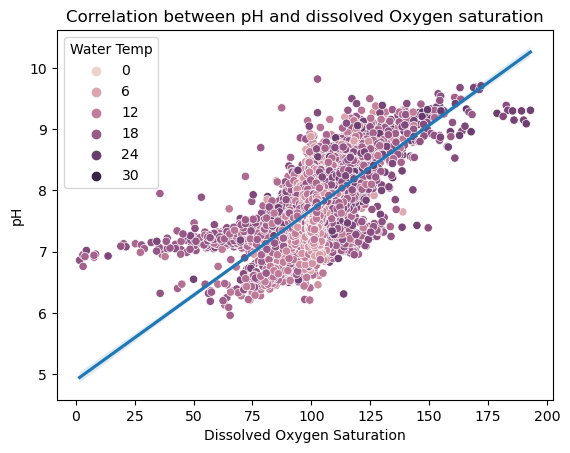

In [14]:
sns.scatterplot(data = master_df, x = "Dissolved Oxygen Saturation",y = "pH",hue = "Water Temp")
sns.regplot(data=master_df, x="Dissolved Oxygen Saturation", y="pH", scatter=False)
plt.title("Correlation between pH and dissolved Oxygen saturation")



Seaborns scatterplot were used in order to generate the water temp scatterplot. Whereas the regplot function from seaborn outputs the trend line. The trend line shows a positive linear trend between the two varaibles (pH and dissolved oxygen saturation). The key variables identified in the process were the dissolved oxygen saturation, pH, Water Temp for the x and y axis and the points itself (hue as water temp). 

### Three line plots that show the mean pH, dissolved oxygen and water temperature for each hour of the day, grouped by season. 

<Axes: title={'center': 'pH against Hour of day'}, xlabel='Hour of day', ylabel='pH'>

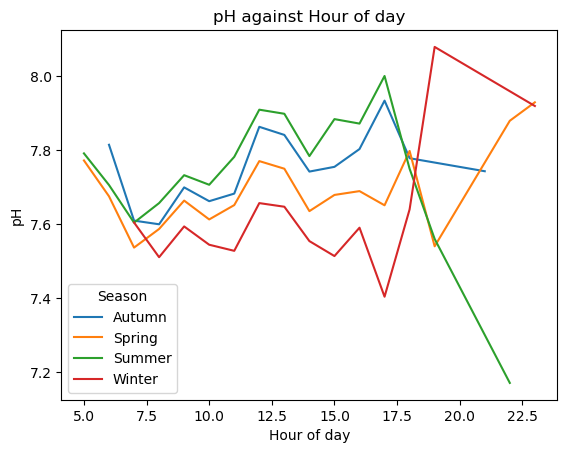

In [15]:

mean_pH = master_df.groupby(["Season", "Hour of day"])["pH"].mean().reset_index()
#add title
plt.title("pH against Hour of day")

sns.lineplot(mean_pH, x="Hour of day", y="pH", hue="Season")




The key variables identified here are the season, hour of day and pH. In order to plot the line plot, the mean pH per hour of day had to be calculated, which is done by the groupby and mean functions. Seaborns lineplot function is used to plot each of the lines via different seasons. Hour of day is represented as the xlab and the pH for the ylab. By viewing the line plots we can observe that summer and winter had the greatest flutuations (steepest gradients) of pH depending on the hour of day. 

<Axes: title={'center': 'Dissolved Oxygen Saturation against Hour of day'}, xlabel='Hour of day', ylabel='Dissolved Oxygen Saturation'>

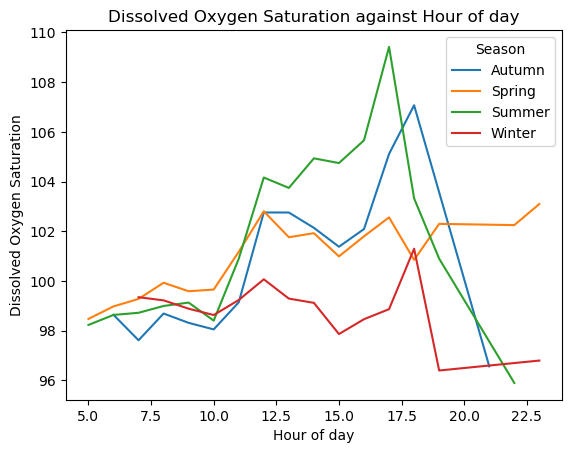

In [16]:
mean_dissolved_oxygen = master_df.groupby(["Season","Hour of day"])["Dissolved Oxygen Saturation"].mean().reset_index()
#add title
plt.title("Dissolved Oxygen Saturation against Hour of day")
sns.lineplot(mean_dissolved_oxygen, x="Hour of day", y ="Dissolved Oxygen Saturation", hue = "Season" )

The key variables identified here are the season, hour of day and dissolved oxygen saturation. To obtain the data to plot, the mean dissolved oxygen saturation was calculated using the groupby and mean functions. Once again the seabrons lineplot function is used to plot the values with hour of day on the xlab and dissolved oxygen saturation on the ylab. Each line represents each of the seasons mean dissolved oxygen. By viewing the line plots we can observe that summer and autumn had the greatest flutuations (highest peaks) of dissolved oxygen saturation depending on the hour of day. 


<Axes: title={'center': 'Water Temp against Hour of day'}, xlabel='Hour of day', ylabel='Water Temp'>

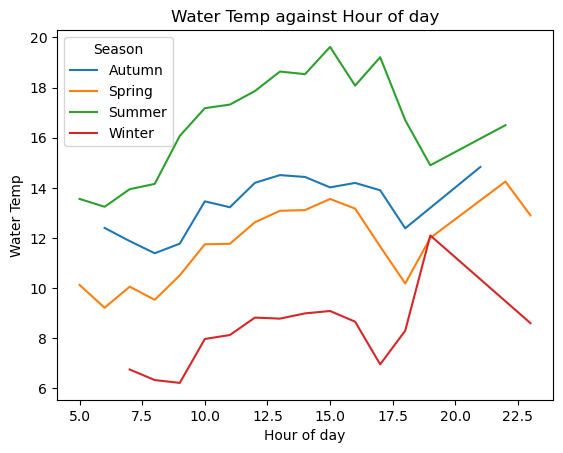

In [17]:
mean_wtemp = master_df.groupby(["Season","Hour of day"])["Water Temp"].mean().reset_index()
#add title
plt.title("Water Temp against Hour of day")
sns.lineplot(mean_wtemp, x="Hour of day", y = "Water Temp", hue = "Season")

The key variables identified here are season, hour of day and water temp. The mean water temp used to plot the data was calculated by using the groupby and mean functions. The lineplot function from seaborn is used to output the plots of mean water temps on different hours of the day, with each line representing each season. The xlab shows the hour of day whereas ylab shows the water temperature. By viewing the line plots we can observe the obvious results as the warmer seasons will have a higher average temperature agains the hour of day. The order of the line plots go from Summer, Autumn, Spring, Winter (highest temp to lowest).

# Part 3 : NIWA Suitability Analysis

https://niwa.co.nz/sites/niwa.co.nz/files/import/attachments/Suitability-of-NZ-rivers-for-contact-recreation.pdf
E Coli and Water Clarity

In [18]:
#Create median visibility and median E Coli





filtered_df_2008 = master_df[(master_df['Year'] >= 2005) & (master_df['Year'] <= 2008)]


median_visibility_df_2008 = filtered_df_2008.groupby('SiteID')['Water Clarity'].median()
median_ecoli_df_2008 = filtered_df_2008.groupby('SiteID')['E Coli'].median()

name_series_2008 = filtered_df_2008.groupby('SiteID')['Name'].first()

# Create a new DataFrame with median values and "Name" column
suitability_df_2008 = pd.DataFrame({
     "Name": name_series_2008,
    "Visibility (m)_2008": median_visibility_df_2008,
    "E Coli (cfu/100 mL)_2008": median_ecoli_df_2008
}).reset_index()

print(suitability_df_2008)


   SiteID                     Name  Visibility (m)_2008  \
0     AK1           Hoteo at Gubbs               0.6600   
1     AK2   Rangitopuni at Walkers               0.6800   
2     AX1    Clutha at Luggate Br.               5.7000   
3     AX2      Kawarau at Chard Rd               2.0550   
4     AX3  Shotover at Bowens Peak               0.6250   
..    ...                      ...                  ...   
72    WN1         Hutt at Boulcott               2.7450   
73    WN2          Hutt at Kaitoke               4.9250   
74    WN3   Ruamahanga at Waihenga               1.4450   
75    WN4   Ruamahanga at Wardells               1.8650   
76    WN5        Ruamahanga at SH2               4.3475   

    E Coli (cfu/100 mL)_2008  
0                      125.9  
1                      235.9  
2                        2.0  
3                        3.1  
4                        2.0  
..                       ...  
72                     121.0  
73                       4.1  
74          

The first process was to filter the data for the years 2005 to 2008 using the year column. Then I have calculated the median visibility and E. coli values using the groupby and median function by siteID on water clarity and E Coli readings. Thirdly to get the names of the siteID groupby was used, then each of those filtered data were all combined as suitability_df_2008 using the dictionary stored as key value pairs.

In [19]:
#Create median visibility and median E Coli



filtered_df_2022 = master_df[(master_df['Year'] >= 2019) & (master_df['Year'] <= 2022)]

median_visibility_df_2022 = filtered_df_2022.groupby('SiteID')['Water Clarity'].median()
median_ecoli_df_2022 = filtered_df_2022.groupby('SiteID')['E Coli'].median()
name_series_2022 = filtered_df_2022.groupby('SiteID')['Name'].first()

# Create a new DataFrame with median values and "Name" column
suitability_df_2022 = pd.DataFrame({
    "Name": name_series_2022,
    "Visibility (m)_2022": median_visibility_df_2022,
    "E Coli (cfu/100 mL)_2022": median_ecoli_df_2022
}).reset_index()

print(suitability_df_2022)

   SiteID                          Name  Visibility (m)_2022  \
0     AK1                Hoteo at Gubbs               1.5000   
1     AK2        Rangitopuni at Walkers               1.3700   
2     AX1         Clutha at Luggate Br.               4.8200   
3     AX2           Kawarau at Chard Rd               1.0500   
4     AX3       Shotover at Bowens Peak               0.3700   
5     AX4        Clutha at Millers Flat               1.9000   
6     CH1           Hurunui at Mandamus               1.7500   
7     CH2            Hurunui at SH1 Br.               0.7400   
8     CH3          Waimakariri at Gorge               0.4400   
9     CH4  Waimakariri above old HW Br.               0.3725   
10    DN4           Clutha at Balclutha               1.6300   
11    DN5       Mataura at Seaward Down               1.0000   
12    DN9            Waiau at Tuatapere               1.6300   
13    GS1         Waipaoa at Kanakanaia               0.0725   
14    GS2          Waikohu at No. 1 Br. 

The first step of the process was to filter the data using the year column from 2019 to 2022. Then the groupby function using the SiteID to calculate median water clarity, median E Coli and siteID's name. Once again the dictionary is created with the name suitability_df_2022 which stores each of the key value pairs.

SiteID                        Name_x  Visibility (m)_2008  \
0     AK1                Hoteo at Gubbs               0.6600   
1     AK2        Rangitopuni at Walkers               0.6800   
2     AX1         Clutha at Luggate Br.               5.7000   
3     AX2           Kawarau at Chard Rd               2.0550   
4     AX3       Shotover at Bowens Peak               0.6250   
5     AX4        Clutha at Millers Flat               2.7250   
6     CH1           Hurunui at Mandamus               2.1750   
7     CH2            Hurunui at SH1 Br.               1.8750   
8     CH3          Waimakariri at Gorge               0.6000   
9     CH4  Waimakariri above old HW Br.               0.2900   
10    DN4           Clutha at Balclutha               1.4550   
11    DN5       Mataura at Seaward Down               0.8950   
12    DN9            Waiau at Tuatapere               1.8650   
13    GS1         Waipaoa at Kanakanaia               0.1100   
14    GS2          Waikohu at No. 1 Br.               1.6950   
15    GS3           Motu at Waitangirua               1.6900   
16    GS4               Motu at Houpoto               0.8500   
17    GY1             Buller at Te Kuha               1.6750   
18    GY2                Grey at Dobson               2.1150   
19    GY3               Grey at Waipuna               3.6200   
20    GY4        Haast at Roaring Billy               2.4150   
21    HM1                Waipa at Otewa               1.4900   
22    HM2           Waipa at Whatawhata               0.5000   
23    HM6      Ohinemuri at Karangahake               2.5925   
24    HV2           Tukituki at Red Br.               1.6800   
25    HV3      Ngaruroro at Chesterhope               1.3000   
26    HV4      Ngaruroro at Kuripapango               6.6450   
27    NN1          Motueka at Woodstock               4.3675   
28    NN2              Motueka at Gorge              11.4925   
29    NN3            Wairau at Dip Flat               2.8400   
30    NN5            Buller at Longford               5.5850   
31    RO1       Tarawera at Lake outlet               5.3450   
32    RO2        Tarawera at Awakaponga               0.8100   
33    RO3        Rangitaiki at Murupara               2.0050   
34    RO4          Whirinaki at Galatea               1.7600   
35    RO5         Rangitaiki at Te Teko               1.2000   
36    RO6         Waikato at Reids Farm               7.5100   
37    TK1         Opihi at Grassy Banks               4.0350   
38    TK2             Opihi at Rockwood               2.1750   
39    TK3          Opuha at Skipton Br.               2.4075   
40    TK4              Waitaki at Kurow               3.4400   
41    TK5      Hakataramea above MH Br.               4.0950   
42    TK6            Waitaki at SH1 Br.               2.0900   
43    TU1         Whanganui at Te Maire               1.3100   
44    TU2          Tongariro at Turangi               3.1400   
45    WA1        Waitara at Bertrand Rd               0.5850   
46    WA2               Manganui at SH3               3.8250   
47    WA4          Whanganui at Paetawa               0.9650   
48    WA5       Rangitikei at Mangaweka               1.4100   
49    WA7          Manawatu at Weber Rd               1.1000   
50    WH1      Waipapa at Forest Ranger               2.2550   
51    WH2          Waitangi at Wakelins               1.4550   
52    WH3      Mangakahia at Titoki Br.               0.6500   
53    WH4                Wairu at Purua               0.6550   
54    WN2               Hutt at Kaitoke               4.9250   
55    WN5             Ruamahanga at SH2               4.3475   

    E Coli (cfu/100 mL)_2008                        Name_y  \
0                     125.90                Hoteo at Gubbs   
1                     235.90        Rangitopuni at Walkers   
2                       2.00         Clutha at Luggate Br.   
3                       3.10           Kawarau at Chard Rd   
4                       2.00       Shotover 

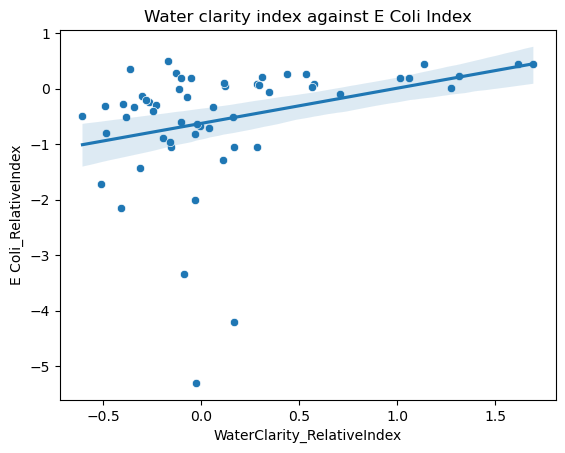

In [20]:
#Merge based on site ID then take league table indexing, get the 2022 and normalise against 2008.
leagueTable = suitability_df_2008.merge(suitability_df_2022, on="SiteID")

#Using the two datasets compute a relative index for water clarity (2022-2008)/2008
leagueTable["WaterClarity_RelativeIndex"] = (leagueTable["Visibility (m)_2022"] - leagueTable["Visibility (m)_2008"]) / leagueTable["Visibility (m)_2008"]
#Using the two datasets compute a relative index for E Coli (2008-2022)/2008
leagueTable["E Coli_RelativeIndex"] = (leagueTable["E Coli (cfu/100 mL)_2008"] - leagueTable["E Coli (cfu/100 mL)_2022"]) / leagueTable["E Coli (cfu/100 mL)_2008"]

#Create a scatter plot of the two indicies with an optional trend line
sns.scatterplot(data = leagueTable, x = "WaterClarity_RelativeIndex", y = "E Coli_RelativeIndex")
plt.title("Water clarity index against E Coli Index")
plt.xlabel("Water Clarity Index")
plt.ylabel("E Coli Index")
sns.regplot(data=leagueTable, x="WaterClarity_RelativeIndex", y="E Coli_RelativeIndex", scatter=False)


display(leagueTable)                                               

To create the league table I have merged the suitability data frames for 2005-2008 and 2019-2022 using the siteID as the unique key. The formula given in the assignemnt specification has been used to calculate the relative indexes for water clarity and E Coli. Then those relative indexes has been created as new columns in the league table. A scatter plot has been created using the seaborn package to visualise the correlation of water clarity index against E Coli index. The extra trend line via the regplot function allows us to see a positive correlation between the two variables. Therefore as E Coli's relative increase, the water clairty relative index will also increase. Even though some outliers can be observed, near the 0.0 of water clairty index and -5 of E Coli index it will not affect the overall trend.

In [21]:


# Assuming leagueTable is the merged and normalized DataFrame

# Create logical tests for improvement
leagueTable["EColi_Improved"] = leagueTable["E Coli_RelativeIndex"] > 0
leagueTable["WaterClarity_Improved"] = leagueTable["WaterClarity_RelativeIndex"] > 0

# Create a crosstab to display counts
subset_cols = ["WaterClarity_RelativeIndex", "E Coli_RelativeIndex"]
leagueTable.dropna(subset=subset_cols, inplace=True)

crosstab_counts = pd.crosstab(leagueTable["WaterClarity_Improved"], leagueTable["EColi_Improved"])

# Swap the counts in rows and columns
crosstab_counts = crosstab_counts.iloc[::-1, ::-1]

# Rename the index and columns for clarity
crosstab_counts.columns = ["E Coli Improved", "E Coli Not Improved"]
crosstab_counts.index = ["Water Clarity Improved", "Water Clarity Not Improved"]

# Display the crosstab
print(crosstab_counts)



                            E Coli Improved  E Coli Not Improved
Water Clarity Improved                   16                    9
Water Clarity Not Improved                5                   26


Firstly I have created the improved column for E Coli and water clarity when their index values are greater than 0. Secondly the data undergoes the crossstab function from the pandas package to create the crossstab and some manual index switches had to be made as the results position were inversed. 

Upon observing the matrix, it suggests that there are increasing cases of contaminated water in the time frame from 2008 to 2022. As there are 26 total counts of E Coli and water clarity not improved and 16 total counts of improved in both E Coli and water clarity. This is not the result we wished for, as it suggests the water quality to decrease in the following years. We can also observe 5 cases where the E Coli improved however the water clarity uninproved, 9 cases of water clarity improved and E Coli not improved.

# Part 4: Linear Regression
*The processes for coding the linear regressions and crossvalidation has been breifly explained in the code comments below

## Water temp against Year, Season, Time of day, and Longitude / Latitude

In [22]:
temp_model_data
# removing unwanted columns
columns_to_remove = ["URS","Water Kelvin"]
# dropping the columns
temp_model_data.drop(columns=columns_to_remove, inplace=True)

# One-hot encode categorical features
temp_model_data = pd.get_dummies(temp_model_data, columns=["Season"])



In [23]:
# create target name
target_name = 'Water Temp' ## identify the name of the column that we are interested in modelling (the response)
# create feature columns list
feature_names = [ "Year","Season_Autumn","Season_Spring","Season_Summer","Season_Winter","Hour of day","Longitude","Latitude" ]

# create training data
X = temp_model_data[feature_names].to_numpy()
t = temp_model_data[target_name].to_numpy()
X_train, X_test, t_train, t_test = train_test_split(X, t, train_size=0.7, random_state=1234) 


In [24]:
from sklearn.model_selection import KFold, cross_validate
#state the model (linearmodel)
mdl = LinearRegression()
mdl.fit(X_train, t_train)
print(f"Intercept value:",mdl.intercept_)


# Predict values for the test set
y_test = mdl.predict(X_test)

# Calculate mean squared error using mean_squared_error function
mse = mean_squared_error(t_test, y_test)
print("Mean Squared Error (MSE):", mse)

# Calculate the score (coefficient of determination) using the model's score() function
score = mdl.score(X_test, t_test)
print("Model Score (R^2):", score)
#stating the number of k folds and undergoes the cross validation process
kf = KFold(n_splits=10, shuffle=True, random_state=1234)
cv_res = cross_validate(LinearRegression(), X, t, cv=kf)

print(f"Cross validation R-Squared performance of linear regression is {np.mean(cv_res['test_score']):.3}")
#Create the model for better visuals
model = pd.DataFrame({"feature" : feature_names,"coefficient":mdl.coef_})
display(model)


Intercept value: -7.583429531509925
Mean Squared Error (MSE): 6.998095443781172
Model Score (R^2): 0.6736459142560385
Cross validation R-Squared performance of linear regression is 0.677


feature  coefficient
0           Year     0.029284
1  Season_Autumn     0.719611
2  Season_Spring    -0.722356
3  Season_Summer     4.679087
4  Season_Winter    -4.676341
5    Hour of day     0.444699
6      Longitude    -0.109157
7       Latitude     0.599151

Upon viewing each of the coefficient values (the effect of each predictor variable on the response variable (Water temp)) we can suggest the following. Overall we can see a large change in water temperature during varying times such as seasonal patterns especially Summer and Winter which is expected, as the outside temperature will be affected greatly with cooler times in the winter and warmer in the summer. For the summer season we expect a 4.68 degree increase and a 4.68 degree decrease in winter. Year is expected to have a severe effect against water temperature as it is expected to increase by 0.029 degrees per year. In 100 years time it's a 2.9 degree increase which is a durastic increase endangering life for some aquatic organisms. Water temperature seems to be somewhat affected by the space as well, as we can read from the coefficient for each unit increase in latitude with 0.6 degrees increase. Whereas for each unit increase in longitude with -0.1 degrees change doesnt show much of a correlation between the water temperature. 

The linear models R^2 value is approximately 0.67 which indicates that approximately 67% of the proportion of varaince is explained by the model. Which leaves the 33% of the varaince model is unexplained. Therefore, predictor variables included in the model explain a significant portion of the observed temperature changes. 


In [25]:
display(env_model_data)

Ammonia  Dissolved Oxygen Saturation  Dissolved Reactive Phosphate  \
196        8.0                         88.9                          21.4   
197        6.0                         90.7                          14.1   
198        1.0                         89.6                          17.7   
199       28.0                         82.1                          27.8   
200       26.0                         88.5                          28.0   
...        ...                          ...                           ...   
29593      2.0                        101.2                           2.0   
29594      3.0                        102.1                           2.0   
29595      3.0                        102.3                           2.0   
29596      4.0                        102.1                           2.0   
29597      1.0                        102.6                           3.0   

       Electrical Conductivity  Nitrate + Nitrite  Water Clarity  Water Temp  \
196                      190.0              155.0           0.68        20.1   
197                      204.0                4.0           1.08        18.9   
198                      227.0                6.0           1.26        14.3   
199                      207.0              694.0           0.59        15.6   
200                      198.0              637.0           0.53        10.5   
...                        ...                ...            ...         ...   
29593                     51.9               29.0          10.00        10.3   
29594                     48.8               22.0           6.80        12.3   
29595                     53.6                5.0          10.48        15.7   
29596                     55.9                8.0          11.47        18.9   
29597                     58.0               21.0          11.44        17.1   

         pH  log(E Coli)  
196    7.43     2.082785  
197    7.62     1.623249  
198    7.66     1.939519  
199    7.22     2.309630  
200    7.37     3.020046  
...     ...          ...  
29593  7.67     0.602060  
29594  7.54     0.602060  
29595  7.64     0.698970  
29596  7.81     0.602060  
29597  7.73     1.431364  

[14250 rows x 9 columns]

## Water temp against Measurement features

In [26]:
env_model_data
target_name = 'Water Temp' ## identify the name of the column that we are interested in modelling (the response)
feature_names = [ "Ammonia", "Dissolved Oxygen Saturation", "Dissolved Reactive Phosphate", "Electrical Conductivity", "Nitrate + Nitrite", "Water Clarity", "pH","log(E Coli)" ]

X = env_model_data[feature_names].to_numpy()
t = env_model_data[target_name].to_numpy()
X_train, X_test, t_train, t_test = train_test_split(X, t, train_size=0.7, random_state=1234) 


In [27]:
from sklearn.model_selection import KFold, cross_validate

#state the model (linearmodel)
mdl = LinearRegression()
mdl.fit(X_train, t_train)
print(f"Intercept value:",mdl.intercept_)


# Predict values for the test set
y_test = mdl.predict(X_test)

# Calculate mean squared error using mean_squared_error function
mse = mean_squared_error(t_test, y_test)
print("Mean Squared Error (MSE):", mse)

# Calculate the score (coefficient of determination) using the model's score() function
score = mdl.score(X_test, t_test)
print("Model Score (R^2):", score)
#stating the number of k folds and undergoes the cross validation process
kf = KFold(n_splits=10, shuffle=True, random_state=1234)
cv_res = cross_validate(LinearRegression(), X, t, cv=kf)

print(f"Cross validation R-Squared performance of linear regression is {np.mean(cv_res['test_score']):.3}")
#Create the model for better visuals
model = pd.DataFrame({"feature" : feature_names,"coefficient":mdl.coef_})
display(model)

Intercept value: -14.630178379576538
Mean Squared Error (MSE): 16.37374887166536
Model Score (R^2): 0.24567701939360176
Cross validation R-Squared performance of linear regression is 0.238


feature  coefficient
0                       Ammonia     0.016849
1   Dissolved Oxygen Saturation     0.081157
2  Dissolved Reactive Phosphate     0.030752
3       Electrical Conductivity     0.014717
4             Nitrate + Nitrite    -0.002794
5                 Water Clarity     0.220015
6                            pH     1.892582
7                   log(E Coli)     1.677189

Upon observing the coefficient values (the effect of each predictor variable on the response variable (water temp)) we can suggest the following.
The features that had the most effect with the changing environment would be pH, log(E Coli) and potentially water clarity. The linear regression model suggests that for a unit of pH the water temperature increased by 1.89 degrees, which makes it evident that water temperature changes against the environmental factors (pH). For example, the pH of the water will differ in regions with varying pH in the soil of the water source affecting the water temperature.  For a unit increase of log(E Coli) value, the water temperature approximately increased by 1.68 degrees. Which is interesting and will need further investigation to find how E Coli acts on water temperature. Water clarity most likely has a small effect on water temperature as the coefficient is 0.22 degrees. This small value seems negligible however we do not have enough evidence to rule out the option.

The R^2 value with the linear regression performance was approximatley 0.24. This is likely a poor fit as it only explains approximately 23.8% of the proportion of variances leaving the majority (approximately 76.2%) of the variance from the predictor variables unexplained. 


## pH against the Measurement features

In [28]:
target_name = 'pH' ## identify the name of the column that we are interested in modelling (the response)
feature_names = [ "Ammonia", "Dissolved Oxygen Saturation", "Dissolved Reactive Phosphate", "Electrical Conductivity", "Nitrate + Nitrite", "Water Clarity", "Water Temp","log(E Coli)" ]

X = env_model_data[feature_names].to_numpy()
t = env_model_data[target_name].to_numpy()
X_train, X_test, t_train, t_test = train_test_split(X, t, train_size=0.7, random_state=1234)

In [29]:
from sklearn.model_selection import KFold, cross_validate

mdl = LinearRegression()
mdl.fit(X_train, t_train)
print(f"Intercept value:",mdl.intercept_)


# Predict values for the test set
y_test = mdl.predict(X_test)

# Calculate mean squared error using mean_squared_error function
mse = mean_squared_error(t_test, y_test)
print("Mean Squared Error (MSE):", mse)

# Calculate the score (coefficient of determination) using the model's score() function
score = mdl.score(X_test, t_test)
print("Model Score (R^2):", score)

#stating the number of k folds and undergoes the cross validation process
kf = KFold(n_splits=10, shuffle=True, random_state=1234)
cv_res = cross_validate(LinearRegression(), X, t, cv=kf)

print(f"Cross validation R-Squared performance of linear regression is {np.mean(cv_res['test_score']):.3}")
#Create the model for better visuals
model = pd.DataFrame({"feature" : feature_names,"coefficient":mdl.coef_})
display(model)

Intercept value: 5.272879733514568
Mean Squared Error (MSE): 0.06907385654076616
Model Score (R^2): 0.5216025109483045
Cross validation R-Squared performance of linear regression is 0.507


feature  coefficient
0                       Ammonia    -0.001868
1   Dissolved Oxygen Saturation     0.022584
2  Dissolved Reactive Phosphate    -0.000409
3       Electrical Conductivity     0.001290
4             Nitrate + Nitrite    -0.000104
5                 Water Clarity     0.013164
6                    Water Temp     0.008178
7                   log(E Coli)    -0.037927

Upon observing the coefficient values (the effect of each predictor variable (measurements) on the response variable (pH)) we can suggest the following). We can observe that the increase of dissolved oxygen saturation of the environment increases the levels of the pH by 0.022. This is as expected since the increased presence of oxygen will increase the pH making the water basic/alkaline and vice versa. The environmental factor with changing Log(E Coli) approximately decreases the pH by 0.038. This is most likely due to the growth of E Coli which maintains a certain pH level and contaminates the water sources. Electrical conductivity, water clarity and water temp could have potential of varying the pH levels however will need further analysis as the coefficients are currently negligible.

The R^2 score of linear regression is approximately 0.51, thus the model shows approximately 51% of the proportion of variances, leaving the rest of the variance of predictor variables unexplained. 

# Conclusion

In the course of this report we embarked on a comprehensive exploration of the suitability of New Zealand waterways, utilizing many data science techniques such as: data wrangling, exploratory data analysis, linear regression analysis and various visual representations of the data. These techniques help us to understand the New Zealand water ways in depth allowing us to find methods to prevent the water quality from declining. 

### Key findings

Data Wrangling: The critical initial step of data wrangling allowed us to ensure the dataset's cleanliness and completeness for further analysis techniques. Without this step, EDA and visualisations will be troublesome due to the missing data or the extra disposable columns in the datasets.

Exploratory Data Analysis (EDA): Using EDA, we investigated the relationships and distributions that the data contained. We gained a deep understanding of the behaviours and prospective trends of the variables via the visual representations.

Data querying / exploration: Manipulating the datasets into subsetted dataframes to obtain relationships which will be used in visualisation of the data. 

We sought to identify any potential linear correlations between the variables by doing a linear regression analysis. With the help of this analytical technique, we were able to quantify the effects of particular variables and get insights into the characteristics that affect the suitability of New Zealand waterways.

Utilising different visual representations, such as scatter plots, lineplots, heatmaps, pair plots and crosstabs allowed a concise understanding of the findings for viewers of the analysis.
